In [26]:
import os
import numpy as np
import pandas as pd
import pydicom

from glob import glob
from matplotlib import pyplot as plt
from mask_functions import rle2mask, mask2rle

In [19]:
SAMPLES_PATH = './sample_images/*.dcm'
SAMPLE_CSV_PATH = './sample_images/train-rle-sample.csv'

In [16]:
# Show information from one dcm file

dcm_file = glob(SAMPLES_PATH)[0]
dcm_data = pydicom.dcmread(dcm_file)
print(dcm_data)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.4982.1517875185.837576
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: 'fd903dff-4b47-4598-99bb-2ec488eb2c31'
(0010, 0020) Patient ID                          LO: 'fd903dff-4b47-4598-99bb-2ec488eb2c31'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient's

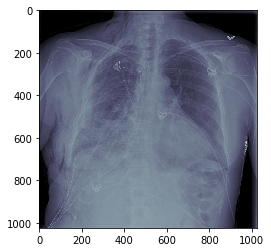

In [18]:
# Show the image from the data
# https://pydicom.github.io/pydicom/stable/working_with_pixel_data.html#pixel-array

plt.imshow(dcm_data.pixel_array, cmap=plt.cm.bone)

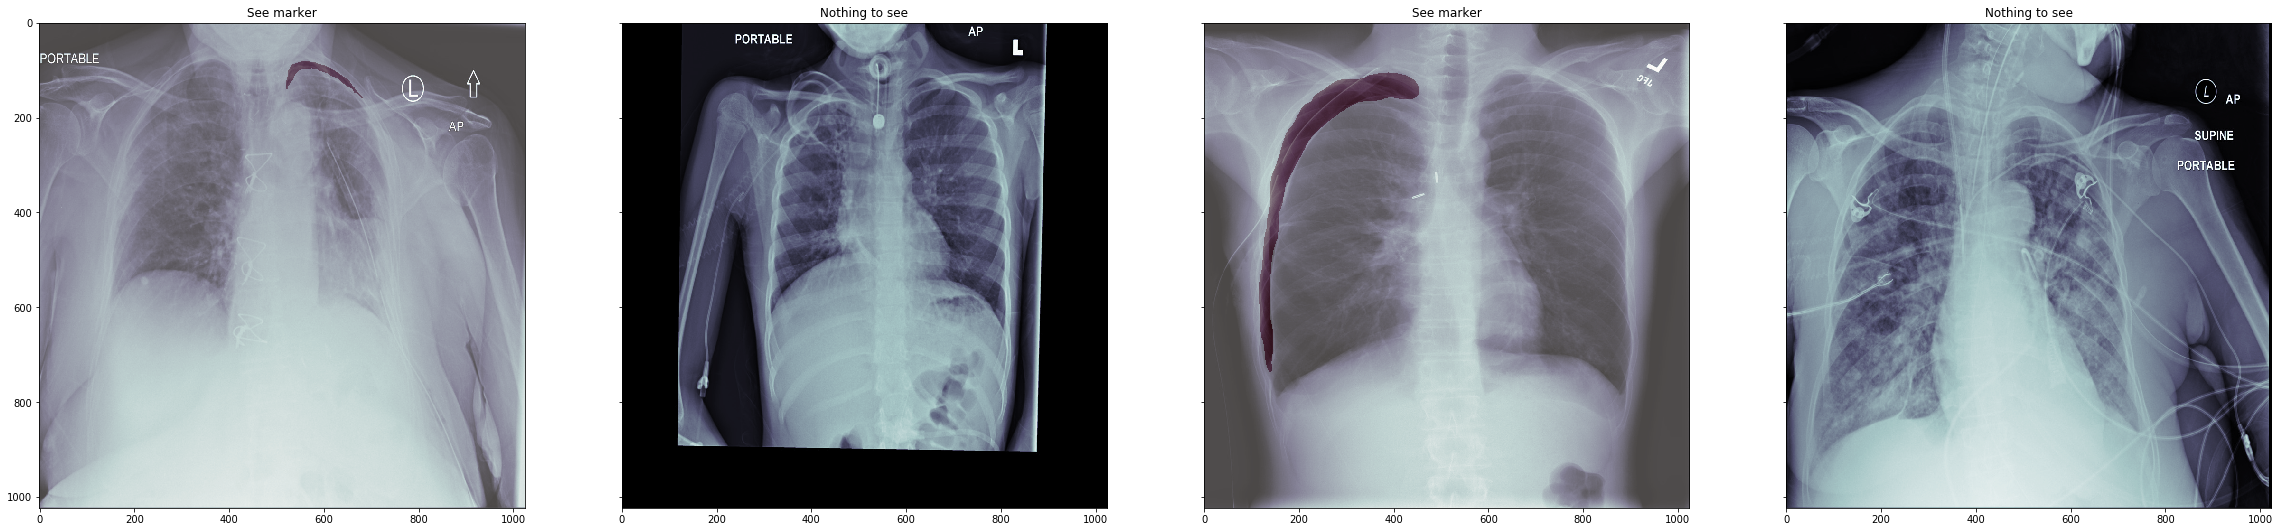

In [27]:
# Show the masks
start = 5
num_imgs = 4

df = pd.read_csv(SAMPLE_CSV_PATH, header=None, index_col=0)

fig, ax = plt.subplots(nrows=1, ncols=num_imgs, sharey=True, figsize=(num_imgs*10, 10))

for q, file_path in enumerate(glob(SAMPLES_PATH)[start:start + num_imgs]):
    dataset = pydicom.dcmread(file_path)
    ax[q].imshow(dataset.pixel_array, cmap=plt.cm.bone)
    if df.loc[file_path.split('/')[-1][:-4], 1] != '-1':
        mask = rle2mask(df.loc[file_path.split('/')[-1][:-4], 1], 1024, 1024).T
        ax[q].set_title('See marker')
        ax[q].imshow(mask, alpha=0.3, cmap="Reds")
    else:
        ax[q].set_title('Nothing to see')